# PROJECT MOTIVATION : Introduction
___

Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because ["they're good dogs Brent."](http://knowyourmeme.com/memes/theyre-good-dogs-brent) WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017
___

**To meet specifications, the issues that satisfy the Project Motivation the below Key Points must be assessed.**

1) You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.

2) Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.

3) Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html)

4) The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs

5) You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

6) `Note:` do not include your Twitter API keys, secrets, and tokens in your project submission.



# PROJECT DETAILS

## A) Data wrangling, which consists of:
    1. Gathering data
    2. Assessing data
    3. Cleaning data
    
## B) Storing, analyzing, and visualizing your wrangled data

## C) Reporting on 
    1) your data wrangling efforts and
    2) your data analyses and visualizations

# A) Data Wrangling 

## 1. Gathering Data for this Project

---
### 1.1 Gathering data : The WeRateDogs Twitter archive (data on hand)
The WeRateDogs Twitter archive : twitter_archive_enhanced.csv

We had this file on hand ie were given this file and we downloaded it manually by clicking the following [link](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv)

We then viewed the data content using Excel Spreadsheets, to get a view on what we had on 

twitter_archive_enhanced.csv is a Flat File, as it contains tabular in data plain text format with one data record per line and each record or line having one or more fields. These fields are separated by delimiters, like commas, tabs, or colons - in our case the file is comma-separated.

We then used pandas `read_csv` function to parse the flat file into python

In [1]:
#load modules
import pandas as pd
import numpy as np

In [28]:
# Import the WeRateDogs Twitter archive CSV file into a DataFrame
archives = pd.read_csv('twitter-archive-enhanced.csv')

In [17]:
# Check to see if the file was imported correctly
archives.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


___

### 1.2 Gathering data : The tweet image prediction - Downloading Files from the internet
The tweet image predictions - image_predictions.tsv

The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. 

This file (image_predictions.tsv) is hosted on Udacity's servers. So we proceeded to download the file programmatically using the [Requests library](http://docs.python-requests.org/en/master/)  and the following [URL](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)

In [4]:
# import modules 
import requests
import os

In [5]:
# proceed to download the online file - programatically
image_pred_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

#get the response from image_pred_url
response = requests.get(image_pred_url)

# `open` and return corresponding file object specified on file path and mode
with open(image_pred_url.split('/')[-1], mode='wb') as file:
    #write the response body to local file
    file.write(response.content) 

### 1.2 Gathering data : The tweet image prediction - Downloading Files from the internet ... continued

We then viewed the data content using Excel Spreadsheets. `image_predictions.tsv` is also a Flat File, with its fields separated by tabs

We then used pandas `read_csv` function to parse the flat file into python


In [3]:
# Import the tweet image prediction TSV file into a DataFrame
image_preds = pd.read_csv('image-predictions.tsv', sep = '\t')

In [19]:
# Check to see if the file was imported correctly
image_preds.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True



---

### 1.3 Gathering data : tweet's retweet count, favorite ("like") count at minimum, etc - Twitter API

We then used the tweet IDs in the WeRateDogs Twitter archive - to query the Twitter API for each tweet's JSON data using Python's [Tweepy library](http://www.tweepy.org/).

We then stored each tweet's entire set of JSON data in a file called `tweet_json.txt` file - with each tweet's JSON data should be written to its own line. 

Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count


---

In [5]:
# import modules 
#import tweepy
import time
import json

In [ ]:
#Keys and tokens
consumer_key =  'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# API object to gather Twitter Data
# set wait_on_rate_limit and wait_on_rate_limit_notify parameters to True 
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [ ]:
# Test API fetch with archives records
# query archives tweets and store the extra data on tweet_json.txt file (line by line)
tweet_ids = archives['tweet_id']


with open('tweet_json.txt', 'a+', encoding='utf-8') as file:
    for tweet_id in tweet_ids :
        try :
            # time API query period
            start = time.time()
            tweet = api.get_status(tweet_id, tweet_mode='extended') 
            end = time.time()
           
            #print('\n{}', i)
            #print('\n{} - took {} secs to query'.format(tweet_id, end - start))
            
            #write to file 
            #Convert Tweepy Status object into JSON - http://bit.ly/2REQwNr
            file.write(json.dumps(tweet._json)) 
            file.write('\n')
            
        except :
            pass

In [6]:
# import the json objects from the tweet_json.txt file into a list of dictionaries
tweet_list = []
with open('tweet_json.txt') as file:
    status = []
    for line in file:
        data = json.loads(line)
        
        # append to extra_list - creating a list of dictionaries
        tweet_list.append({"tweet_id" : data["id"],
                          "retweet_count" : data["retweet_count"],
                          "favorite_count" : data["favorite_count"]})
        
tweets = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])   

In [21]:
# Check to see if the file was imported correctly
tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8805,39404
1,892177421306343426,6453,33723
2,891815181378084864,4279,25396
3,891689557279858688,8890,42753
4,891327558926688256,9683,40917


## 2. Assessing Data for this Project
___
Now that we have gathered data - we proceed to assess them visually and programmatically for quality and tidiness issues. 

We are going to detect and document at least
-  eight (8) quality issues
-  two (2) tidiness issues

___
We are now going to be Assessing the data, as the precursor to cleaning. We will identify and categorize the data quality and tidiness issues

Unclean Data can either be Dirty or Messy Data :

1. __Dirty data OR Low quality data__ has issues its content - can include things like : inaccurate data, corrupted data, duplicate data 

2. While __Messy data OR Untidy data__ has issues with its structure. Tidy data means
	- Each variable forms a column
	- Each observation forms a row
	- Each observational unit forms a table


We are going to be assessing the data both visually and programmatically : while assessing we will detect and document the unclean issues we observed 

### 2.1 The Data

**The Data  : Enhanced Twitter Archive**

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. 

The archive contains : 
- each `tweet's text`, which was used to extract `rating`, `dog name`, and `dog "stage" (i.e. doggo, floofer, pupper, and puppo)` to make this Twitter archive "enhanced." 
- Of the 5000+ tweets, There are only **2356 tweets with ratings only** 
- `ratings`, `dog name` and `dog stages` aren't all correct - they need to be assessed and cleaned (if we want to use them for analysis and visualization)

In [22]:
# Display the archives table
archives

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


**The Data : Additional Data via the Twitter API**

Back to the basic-ness of Twitter archives: `retweet_count` and `favorite_count` are two of the notable column omissions. It contains the most recent tweets for WeRateDogs. This data was gathered via the Twitter API using the **tweet IDs : `tweet_id` ** on the **WeRateDogs Twitter archive** - `archives`

In [293]:
# Display the tweets table
tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8805,39404
1,892177421306343426,6453,33723
2,891815181378084864,4279,25396
3,891689557279858688,8890,42753
4,891327558926688256,9683,40917


**The Data : Image Predictions File**

The WeRateDogs Twitter archive - **`archives`** was run through a [neural network](https://www.youtube.com/watch?v=2-Ol7ZB0MmU) that can classify breeds of dogs*. The results: a table full of image predictions (the top three only) alongside each **tweet ID : `tweet_id`**, `image URL`, and the `image number` that corresponded to the _most confident prediction (numbered 1 to 4 since tweets can have up to four images)_.


Where for example :
- **p1** - is the algorithm's #1 prediction for the image in the tweet _eg: golden retriever_
- **p1_conf** - is how confident the algorithm is in its #1 prediction _eg: 95%_
- **p1_dog** -  is whether or not the #1 prediction is a breed of dog _eg: TRUE_



In [294]:
# Display the image_preds table
image_preds.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 2.2 Assess - Data Quality and Tidiness :

__To meet specifications, the issues that satisfy the Project Motivation the below Key Points must be assessed.__

1. We want only original ratings that have images - meaning we are going to be  :
    - removing retweet data
    - removing data without images

2. We are going to be assessing and cleaning at least :
    - 8 quality issues and 
    - at least 2 tidiness issues in this dataset.

3. We will be merging individual pieces of data with accordance to the [rules of tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html)

4. We will not be assessing data with numerators are greater than the denominators as a quality issue - as this follows the [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) of the WeRateDogs Twitter handle

5. We do not need to gather the tweets beyond August 1st, 2017  
    - as it its likely we won't be able to gather the image predictions for these tweets since we don't have access to the algorithm used
    
___

Using `pandas` we programmatically and visually assessed the quality (content) and tidiness (structure) of our data

In [42]:
# programmatically assess table : archives
archives.info() # print information about a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [32]:
# tweet with wrongly extracted rating_numerator  - with rating 13.5/10
#archives[archives['text'].str.contains('13.5')]
print(archives.iloc[45])
archives.iloc[45]['text']

tweet_id                                                     883482846933004288
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-08 00:28:19 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Bella. She hopes her smile made you sm...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/883482846...
rating_numerator                                                              5
rating_denominator                                                           10
name                                    

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'

In [7]:
# some archives are retweets ie text starts with 'RT @dog_rates'
archives['text'].str.startswith('RT @dog_rates').sum()

156

In [252]:
# some archives are retweets ie text starts with 'RT @dog_rates'
columns = ['tweet_id', 'retweeted_status_id', "text" ]

print(sum(archives['retweeted_status_id'].notnull()))
archives.loc[archives['retweeted_status_id'].notnull(), columns].sample(5)

181


,tweet_id,retweeted_status_id,text
694,786729988674449408,7.594477e+17,RT @dog_rates: This is Oakley. He has no idea what happened here. Even offered to help clean it up. 11/10 such a heckin good boy https://t.…
146,863471782782697472,8.630625e+17,RT @dog_rates: Say hello to Quinn. She's quite the goofball. Not even a year old. Confirmed 13/10 but she really needs your help \n\nhttps://…
606,798340744599797760,7.717705e+17,RT @dog_rates: This is Davey. He'll have your daughter home by 8. Just a stand up pup. 11/10 would introduce to mom https://t.co/E6bGWf9EOm
415,822647212903690241,8.224891e+17,RT @dog_rates: This is Paisley. She really wanted to be president this time. Dreams officially crushed. 13/10 https://t.co/liJGwMp17E
475,816062466425819140,8.159907e+17,RT @dog_rates: Meet Jack. He's one of the rare doggos that doesn't mind baths. 11/10 click the link to see how you can help Jack!\n\nhttps://…


In [120]:
# archives source values 
archives['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [121]:
# there are 745 tweets with names None instead of NaN
sum(archives['name'] == 'None')

745

In [122]:
#sample of tweets with names = None
columns = ["tweet_id", "text", "name"]
archives.loc[archives['name'] == 'None', columns].sample(3)

,tweet_id,text,name
2099,670717338665226240,*screams for a little bit and then crumples to the floor shaking* 12/10 https://t.co/W2MCt9pTed,None
5,891087950875897856,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,None
766,777684233540206592,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",None


In [225]:
# Number of records without any dog stage assigned
mask = (archives.doggo != 'None') | (archives.floofer != 'None')
mask = mask | (archives.pupper != 'None') |(archives.puppo != 'None')

print(sum(mask))
archives.loc[mask, columns].sample(4)

# Note :: tweets below have 1 or more dog stages
# tweet_id : 854010172552949760  -  has dog stages : doggo  and floofer
# tweet_id : 890240255349198849 -  has dog stages : doggo 

380


,tweet_id,doggo,floofer,pupper,puppo
1040,744223424764059648,None,None,pupper,None
94,874012996292530176,None,None,None,puppo
1589,686683045143953408,None,None,pupper,None
1807,676916996760600576,None,None,pupper,None


In [177]:
# Number of records without any dog stage assigned
mask = (archives.doggo == 'None') & (archives.floofer == 'None')
mask = mask & (archives.pupper == 'None') & (archives.puppo == 'None')

print(sum(mask))
archives.loc[mask, columns].sample(4)

# Note :: tweets below do not have dog stages
# tweet_id : 882045870035918850  -  has dog stages : None

1976


,tweet_id,text,doggo,floofer,pupper,puppo
52,882045870035918850,"This is Koko. Her owner, inspired by Barney, recently built a cart for her to use during walks if she got tired. 13/10 rest easy Koko https://t.co/zeDpnsKX7w",None,None,None,None
479,815745968457060357,RT @dog_rates: Say hello to Levi. He's a Madagascan Butterbop. One of the more docile Butterbops I've seen. 12/10 would give all the pets h…,None,None,None,None
1163,723673163800948736,This is Ivar. She is a badass Viking warrior. Will sack your village. 10/10 savage af https://t.co/Dz6MiVssVU,None,None,None,None
572,801285448605831168,oh h*ck 10/10 https://t.co/bC69RrW559,None,None,None,None


In [214]:
columns = ["tweet_id", "text", "doggo", "floofer", "pupper", "puppo"]

# Number of records with 1 or more dog stages
mask = (archives.doggo != 'None') | (archives.floofer != 'None')
mask = mask | (archives.pupper != 'None') | (archives.puppo != 'None')

print(sum(mask))
#archives.loc[mask, columns].sample(100)
archives.loc[mask, columns].sample(4)

# tweet_id : 854010172552949760  -  has dog stages : doggo  and floofer
# tweet_id : 855851453814013952 -  has dog stages : doggo and puppo
# tweet_id : 890240255349198849 -  has dog stages : doggo 

380


,tweet_id,text,doggo,floofer,pupper,puppo
98,873213775632977920,This is Sierra. She's one precious pupper. Absolute 12/10. Been in and out of ICU her whole life. Help Sierra below\n\nhttps://t.co/Xp01EU3qyD https://t.co/V5lkvrGLdQ,None,None,pupper,None
1330,705786532653883392,"Seriously, add us 🐶 11/10 for sad wet pupper https://t.co/xwPE9faVZR",None,None,pupper,None
962,750868782890057730,Meet Milo. He hauled ass until he ran out of treadmill and then passed out from exhaustion. 11/10 sleep tight pupper https://t.co/xe1aGZNkcC,None,None,pupper,None
1492,692828166163931137,This pupper just descended from heaven. 12/10 can probably fly https://t.co/X6X9wM7NuS,None,None,pupper,None


In [179]:
#Number of archives with `name` set to None
columns = ["tweet_id", "text", "name"]
mask = archives['name'] == "None"

print(mask.sum())
archives.loc[mask, columns].sample(5)

745


,tweet_id,text,name
1372,702217446468493312,"I know it's tempting, but please stop sending in pics of Donald Trump. Thank you ...9/10 https://t.co/y35Y1TJERY",None
2307,666826780179869698,12/10 simply brilliant pup https://t.co/V6ZzG45zzG,None
696,786664955043049472,"""Honestly Kathleen I just want more Ken Bone"" 12/10 https://t.co/HmlEvAMP4r",None
1543,689557536375177216,Downright majestic af 12/10 https://t.co/WFh2FEbYzj,None
99,872967104147763200,Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/EMYIdoblMR,None


In [46]:
# programmatically assess table : tweets
tweets.info() # information about a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 3 columns):
tweet_id          2351 non-null int64
retweet_count     2351 non-null int64
favorite_count    2351 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [47]:
# programmatically assess table : tweets
tweets.describe() # descriptive summary  

,tweet_id,retweet_count,favorite_count
count,2.351000e+03,2351.000000,2351.000000
mean,7.425660e+17,3127.052318,8105.419396
std,6.846560e+16,5231.893912,11978.688134
min,6.660209e+17,0.000000,0.000000
25%,6.783929e+17,617.000000,1418.000000
50%,7.193395e+17,1450.000000,3590.000000
75%,7.989987e+17,3617.000000,10105.500000
max,8.924206e+17,78919.000000,132022.000000


In [295]:
# number of archives without tweet data
sum(~archives['tweet_id'].isin(tweets['tweet_id']))

5

In [379]:
# tweets does not have duplicate records on tweet_id
tweets['tweet_id'].duplicated().sum()

0

In [48]:
# programmatically assess table : image_preds
image_preds.info() # information about a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [314]:
# For all image - the first prediction is the best predicition
mask = (image_preds['p1_conf'] < image_preds['p2_conf']) & (image_preds['p2_conf'] < image_preds['p3_conf'])
sum(mask)


0

In [320]:
#top to common dog breeds
image_preds['p1'].value_counts().head(10)

golden_retriever      150
Labrador_retriever    100
Pembroke              89 
Chihuahua             83 
pug                   57 
chow                  44 
Samoyed               43 
toy_poodle            39 
Pomeranian            38 
malamute              30 
Name: p1, dtype: int64

In [319]:
# dog breeds names containing 'retriever'
#image_preds['p1'].value_counts()
#image_preds['p1'].str.lower().str.contains('retriever').value_counts()
mask = image_preds['p1'].str.lower().str.contains('retriever')
image_preds.loc[mask, 'p1'].value_counts()

golden_retriever            150
Labrador_retriever          100
Chesapeake_Bay_retriever    23 
flat-coated_retriever       8  
curly-coated_retriever      3  
Name: p1, dtype: int64

In [377]:
# image predictions does not have duplicate records on tweet_id
image_preds['tweet_id'].duplicated().sum()

0

In [49]:
# programmatically assess table : image_preds
image_preds['img_num'].value_counts() #counts of unique value - expect 1 to 4 

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [296]:
# number of archives without image prediction data
sum(~archives['tweet_id'].isin(image_preds['tweet_id']))

281

Tip: Data Quality Dimensions or Categories : Completeness > Validity > Accuracy > Consistency

#### Quality

`archives` table :
- has non-recent tweet data (ie `tweets` table has 2351 records instead of 2356)
- has data without images (ie `image_preds` table has 2075 records instead of 2356)
- has retweets (ie records with `retweeted_status_id` is not null)
- invalid value for missing dog name on `name` (ie `None` instead of `NaN`)
- invalid value for missing dog stage (ie `None` instead of `NaN`
- invalid values on `source` ie instead of "Twitter for iPhone", "Vine - Make a Scene", "Twitter Web Client", "TweetDeck" it has urls
- invalid data types : `timestamp` (object instead of timestamp),`retweeted_status_timestamp` (object instead of timestamp), `source` (object instead of categorical) 
- The ratings are not extracted correctly especially decimals on the row 46 (expect `rating_numerator` to be 13.5 instead of 5

`tweets` table:
- N/A

`image_preds` table:
- remove underscores on dog breed 
- use title case on dog breed 


#### Tidiness

`archives` table :
- columns dog stage ie `doggo`, `floofer`, `pupper`, `puppo` should be 1 variable `stage` (note that some tweets have 0, 1 or more stages)

`tweets` table:
- `retweet_count`, `favorite_count` variables should be part of `archives` table

`image_preds` table:
- dog breed ie `p1` variable should be part of `archives` table


## 3. Cleaning Data for this Project

We are now going to clean the issues we documented on the Assess portion of the project 

**Data Cleaning :**
- remedy or fix the quality and tidiness issues identified on assess step 
- data cleaning process : defining, coding and testing
- address the missing data first
- tackle the tidiness issues next 
- And finally, you'll clean up the quality issues

We performed data cleaning programmatically using `python` and `pandas`

___

### 3.1 The Process :: make a copy of original data sets

First we made a copy of each of the tables before the cleaning process (to allow us to still view the original dirty and messy dataset later

In [174]:
# make a copy of the unclean datasets
archives_clean = archives.copy()
tweets_clean = tweets.copy()
image_preds_clean = image_preds.copy()

___
### 3.2 The Process :: Clean the  Messy / Untidy Data

#### Tidiness
`image_preds` table:  dog breed ie `p1` variable - should be part of `archives` table

##### Define
Merge the `p1` columns on `image_preds_clean` to the `archives_clean` table - joining on `tweet_id`. Rename the column to `breed`

##### Code

In [175]:
# merge image_preds_clean.p1 and archives_clean on tweet_id
columns = ['tweet_id', 'p1']
#image_preds_clean.loc[:,columns]
archives_clean = pd.merge(archives_clean, image_preds_clean.loc[:,columns], 
                          on=['tweet_id'], how='left')

# rename column 'p1' to 'breed'
archives_clean.rename(columns={'p1': 'breed'}, inplace=True)

##### Test

In [176]:
#check archives_clean has dog breed variable
archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
breed                         20

#### Tidiness
`tweets` table  `retweet_count`, `favorite_count` variables - should be part of `archives` table

##### Define
Merge the `retweet_count` and `favorite_count` columns on `tweets_clean` to the `archives_clean` table - joining on `tweet_id`

#####  Code

In [177]:
# merge archives_clean and tweets_clean on tweet_id
archives_clean = pd.merge(archives_clean, tweets_clean, on=['tweet_id'], how='left')

##### Test

In [178]:
# check archives_clean now has columns retweet_count and favorite_count
archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
breed                         20

___
### 3.3 The Process :: Clean the  Low Quality Data

#### Quality
`archives`table columns dog stage ie `doggo`, `floofer`, `pupper`, `puppo` should be 1 variable `stage` (note that some tweets have 0, 1 or more stages)

##### Define
For tweets with at least 1 dog stage we will set the column `stage` with values from `doggo`, `floofer`, `pupper`, `puppo` joined on ','. Replace all `stage` values with ',None' as ''. Drop columns `doggo`, `floofer`, `pupper`, `puppo`

##### Code

In [179]:
# columns with dog stages
columns = ['doggo', 'floofer', 'pupper', 'puppo']

# set stage values for all tweets with at least 1 dog stage
mask = (archives_clean['doggo'] == 'None') & (archives_clean['floofer'] == 'None')
mask = mask & (archives_clean['pupper'] == 'None') & (archives_clean['puppo'] == 'None')

archives_clean['stage'] = archives_clean.loc[~mask, columns].apply(lambda x: ','.join(x), axis=1)

# replace all ',None' values with ''
archives_clean['stage'] = archives_clean['stage'].replace(',None', '', regex=True)
archives_clean['stage'] = archives_clean['stage'].replace('None,', '', regex=True)

# drop redundant dog stage columns from archives_clean
archives_clean.drop(columns, axis=1, inplace=True)

##### Test

In [181]:
# check stage is correct for tweet with more than 1 dog stage
archives_clean.loc[archives_clean['tweet_id'] == 855851453814013952, ['tweet_id', 'stage']]

,tweet_id,stage
191,855851453814013952,"doggo,puppo"


In [182]:
# check stage is correct for tweet with 1 dog stage
archives_clean.loc[archives_clean['tweet_id'] == 890240255349198849, ['tweet_id', 'stage']]

,tweet_id,stage
9,890240255349198849,doggo


In [183]:
# check stage is correct for tweet without a  dog stage
archives_clean.loc[archives_clean['tweet_id'] == 882045870035918850, ['tweet_id', 'stage']]

,tweet_id,stage
52,882045870035918850,NaN


In [184]:
# check columns `doggo`, `floofer`, `pupper`, `puppo` have been dropped from archives_clean
archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
breed                         2075 non-null object
retweet_count                 2351 non-null float64
favorite_count                2351 non-null float64
stage                         380 non-null object
dtypes: float64(6), int64(3), o

#### Quality
`archives`table has the ratings that are not extracted correctly especially decimals on the row 46 (we expect `rating_numerator` to be 13.5 instead of 5

##### Define
Extract the ratings from `text` column using regex r'(\d+?\.?\d*\/\d+)' into a new column `rating`. Split `rating` on '/' and replace `rating_numerator` values with the first index. Drop the `rating` column

##### Code

In [185]:
# as shown on http://bit.ly/2VWp2lE
# Extract and split ratings on '/'
archives_clean['rating'] = archives_clean['text'].str.extract(r'(\d+?\.?\d*\/\d+)')
archives_clean['rating_numerator'] = archives_clean['rating'].str.split('/').str[0] 

# Drop rating column
archives_clean.drop(['rating'], axis=1, inplace=True)

# convert 'rating_numerator' to float
archives_clean['rating_numerator'] = archives_clean['rating_numerator'].astype(float)

##### Test

In [186]:
# check if the rating_numerator on row 66 (or index 45) has been corrected
print(archives_clean.iloc[45])
archives_clean.iloc[45]['text']

tweet_id                                                     883482846933004288
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-08 00:28:19 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Bella. She hopes her smile made you sm...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/883482846...
rating_numerator                                                           13.5
rating_denominator                                                           10
name                                    

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'

In [187]:
# check if tweets with int rating_numerator are correctly extracted
print(archives_clean.iloc[44])
archives_clean.iloc[44]['text']

tweet_id                                                     883838122936631299
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-09 00:00:04 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Noah. He can't believe someone made th...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/883838122...
rating_numerator                                                             12
rating_denominator                                                           10
name                                    

"This is Noah. He can't believe someone made this mess. Got the vacuum out for you though. Offered to help clean pup. 12/10 super good boy https://t.co/V85xujjDDY"

In [188]:
# check rating column has been removed
# check rating_numerator now has a float data type
archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null int64
name                          2356 non-null object
breed                         2075 non-null object
retweet_count                 2351 non-null float64
favorite_count                2351 non-null float64
stage                         380 non-null object
dtypes: float64(7), int64(2),

#### Quality
`archives`table has invalid values on `source` ie instead of "Twitter for iPhone", "Vine - Make a Scene", "Twitter Web Client", "TweetDeck" it has urls

##### Define
Create a list of `source` urls called `source_url` from from value_counts(). Replace `source` url with list with values : "Twitter for iPhone", "Vine - Make a Scene", "Twitter Web Client", "TweetDeck" 

##### Code

In [189]:
#list of source urls - http://bit.ly/2CinhGq
source_url = archives_clean['source'].value_counts().index.tolist()
sources = ["Twitter for iPhone", "Vine - Make a Scene", "Twitter Web Client", "TweetDeck"]

# replace source_urls with actual source names
archives_clean['source'] = archives_clean['source'].replace(source_url, sources)

##### Test

In [190]:
archives_clean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

#### Quality
- `archives` table has invalid data type on `timestamp` (is object instead of timestamp)
- `archives` table has invalid data type on `retweeted_status_timestamp` (is object instead of timestamp)
- `archives` table has invalid data type on `source` (is object instead of categorical)
- `archives_clean` table has invalid data type on `retweet_count` and `favorite_count` (is float instead of int)

##### Define
Convert `timestamp` and `retweeted_status_timestamp` to datetime data type. Convert `source` to categorical data types. Convert `retweet_count` and `favorite_count` to int data types after filling np.nan as 0

##### Code

In [191]:
# Convert timestamp and retweeted_status_timestamp To datetime
archives_clean['timestamp'] = pd.to_datetime(archives_clean['timestamp'])
archives_clean['retweeted_status_timestamp'] = pd.to_datetime(archives_clean['retweeted_status_timestamp'])

# To category
archives_clean['source'] = archives_clean['source'].astype('category')

# To integer
archives_clean['retweet_count'] = archives_clean['retweet_count'].fillna(0).astype(int)
archives_clean['favorite_count'] = archives_clean['favorite_count'].fillna(0).astype(int)

##### Test

In [192]:
#check if :
# 1. timestamp and retweeted_status_timestamp variables now have timestamp data type
# 2. source variable now has category data type
archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null category
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null int64
name                          2356 non-null object
breed                         2075 non-null object
retweet_count                 2356 non-null int64
favorite_count                2356 non-null int64
stage                         380 non-null object
dtypes: categor

#### Quality
`archives` table  has invalid value for missing dog name on `name` (ie `None` instead of `NaN`)

##### Define
Replace dog names with value "None" to numpy's NaN 


##### Code

In [193]:
#replace 'None' names with np.nan
archives_clean['name'] = archives_clean['name'].replace("None", np.nan)

##### Test

In [194]:
# check name now has null values 
sum(archives_clean['name'].isnull())

745

In [195]:
#sample of tweets with null names 
columns = ["tweet_id", "text", "name"]
archives_clean.loc[archives_clean['name'].isnull(), columns].sample(3)

,tweet_id,text,name
1065,740711788199743490,Here we are witnessing the touchdown of a pupn...,NaN
1664,682788441537560576,Happy New Year from your fav holiday squad! 🎉 ...,NaN
411,823269594223824897,RT @dog_rates: We only rate dogs. Please don't...,NaN


#### Quality
`archives` table - has retweets (ie records with `retweeted_status_id` is not null)

##### Define
Remove `archives` records with a non-null `retweeted_status_id` and remove variables related to retweets `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`

##### Code

In [196]:
# remove archives with retweet data
archives_clean = archives_clean[archives_clean['retweeted_status_id'].isnull()]

# remove data related to retweets
columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
archives_clean.drop(columns, axis = 1, inplace = True)

##### Test

In [197]:
# check tweets starting with 'RT @dog_rates' have been removed
archives_clean['text'].str.startswith('RT @dog_rates').sum()

0

In [198]:
# check variables related to retweets has been removed
archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null category
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null float64
rating_denominator       2175 non-null int64
name                     1495 non-null object
breed                    1994 non-null object
retweet_count            2175 non-null int64
favorite_count           2175 non-null int64
stage                    344 non-null object
dtypes: category(1), datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 240.2+ KB


#### Quality
`archives` table - has data without images (ie `image_preds` table has 2075 records instead of 2356)

##### Define
Remove rows from `archives_clean` without `tweet_id` on `image_pred_clean`


##### Code

In [199]:
# remove data without image predictions
archives_clean = archives_clean[archives_clean['tweet_id'].isin(image_preds_clean['tweet_id'])]

##### Test


In [200]:
# check if there archives records without image prediction data
sum(~archives_clean['tweet_id'].isin(image_preds_clean['tweet_id']))

0

#### Quality
`archives` table - has non-recent tweet data (ie `tweets` table has 2351 records instead of 2356)

##### Define
Remove rows from `archives_clean` without `tweet_id` on `tweets_clean`


##### Code

In [201]:
# remove data without recent tweets 
archives_clean = archives_clean[archives_clean['tweet_id'].isin(tweets_clean['tweet_id'])]

##### Test

In [202]:
# check if there archives records with non recent tweets
sum(~archives_clean['tweet_id'].isin(tweets_clean['tweet_id']))

0

#### Quality
`image_preds` table - replace '_' with ' ' on dog breed 
`image_preds` table - replace use title case on dog breed 

##### Define
Replace `_`  with whitespaces on `breed` variable on `archives_clean` AND Change case on `breed` to title case using str.title() 

##### Code

In [203]:
#mask = archives_clean['breed'].str.lower().str.contains('retriever')
#sample = archives_clean.loc[mask, 'breed']
#sample = sample.replace('_', ' ', regex=True).str.title()
#print(sample.value_counts())

#replace 
archives_clean['breed'] = archives_clean['breed'].replace('_', ' ', regex=True).str.title()

##### Test

In [204]:
# check breed variable does not have underscores and is in title case
mask = archives_clean['breed'].str.lower().str.contains('retriever')
archives_clean.loc[mask, 'breed'].value_counts()

Golden Retriever            139
Labrador Retriever           95
Chesapeake Bay Retriever     23
Flat-Coated Retriever         8
Curly-Coated Retriever        3
Name: breed, dtype: int64

___
## 4. Storing, Analyzing, and Visualizing Data for this Project

### 4.1 Storing Data
We are now going to store the clean DataFrame(s) in a CSV files
- `twitter_archive_master.csv` - for dataframe : `archives_clean`

In [205]:
#store data on csv files
archives_clean.to_csv('twitter_archive_master.csv', index=False)

### 4.2 Analyze and Visualize the Data

We are now going to analyze and visualize the wrangled data - producing at least **three (3) insights and one (1) visualization**

### 4.2.1 Data Analysis

In [206]:
#describe archives
archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null category
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null float64
rating_denominator       1994 non-null int64
name                     1448 non-null object
breed                    1994 non-null object
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
stage                    306 non-null object
dtypes: category(1), datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 220.2+ KB


#### variable : timestamp

In [207]:
# WeRateDogs Twitter handle has been active from 201
archives_clean['timestamp'].apply(lambda x: x.strftime('%Y')).value_counts().sort_index()


2015    663
2016    974
2017    357
Name: timestamp, dtype: int64

In [208]:
# WeRateDogs Twitter handle has been active from 2015-11 to 2017-08
print(archives_clean['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index().head(1))
archives_clean['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index().tail(1)

2015-11    296
Name: timestamp, dtype: int64


2017-08    2
Name: timestamp, dtype: int64

In [209]:
# most active month - month with most tweets
archives_clean['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().head(1)

2015-12    367
Name: timestamp, dtype: int64

#### variable : source

In [210]:
# most common tweet sources 
archives_clean['source'].value_counts(normalize=True)

Twitter for iPhone     0.980441
Twitter Web Client     0.014042
TweetDeck              0.005517
Vine - Make a Scene    0.000000
Name: source, dtype: float64

#### variable : name

In [211]:
# total number of tweets
archives_clean.shape[0]

1994

In [212]:
# number of tweets without dog names 
archives_clean['name'].isnull().sum()

546

#### variable :dog  breed

In [213]:
# top 10 common dog breeds
archives_clean['breed'].value_counts().head(10)

Golden Retriever      139
Labrador Retriever     95
Pembroke               88
Chihuahua              79
Pug                    54
Chow                   41
Samoyed                40
Pomeranian             38
Toy Poodle             38
Malamute               29
Name: breed, dtype: int64

#### variable : dog stage

In [214]:
archives_clean['stage'].value_counts()

pupper           203
doggo             63
puppo             22
doggo,pupper       9
floofer            7
doggo,puppo        1
doggo,floofer      1
Name: stage, dtype: int64

#### variable : ratings (rating_numerator, rating_denominator) 

In [215]:
# rating_numerator ranges from 0 to 1176
#print(archives_clean['rating_numerator'].value_counts().sort_index().head())
archives_clean['rating_numerator'].min(), archives_clean['rating_numerator'].max()

(0.0, 1776.0)

In [216]:
# rating_denominator ranges from 0 to 1176
#print(archives_clean['rating_numerator'].value_counts().sort_index().head())
archives_clean['rating_denominator'].min(), archives_clean['rating_denominator'].max()

(2, 170)

In [217]:
# number and percentage of ratings with numerator greater than or equal to  denominator 
mask = archives_clean['rating_numerator'] >= archives_clean['rating_denominator']
sum(mask), sum(mask) / archives_clean.shape[0]

(1579, 0.791875626880642)

#### variable : retweet_count, favourite_count

In [218]:
#on average - WeRateDogs Twitter handle had:
# 2762 retweets, 8910 favourites
round(archives_clean['retweet_count'].mean()), round(archives_clean['favorite_count'].mean())

(2762, 8910)

In [219]:
#on average - when numerator ratings were below 10, WeRateDogs Twitter handle had
# 1051 retweets, 2913 favourites
round(archives_clean.loc[archives_clean['rating_numerator'] < 10,
                         ['retweet_count', 'favorite_count' ]].mean()).astype(int)

retweet_count     1043
favorite_count    2849
dtype: int64

In [220]:
#on average - when ratings were equal to or above 10, WeRateDogs Twitter handle had
# 3211 retweets, 10481 favourites
round(archives_clean.loc[archives_clean['rating_numerator'] >= 10,
                         ['retweet_count', 'favorite_count' ]].mean()).astype(int)

retweet_count      3213
favorite_count    10498
dtype: int64

### 4.2.2 Data Visualization

In [221]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,0,'Number of Dogs')

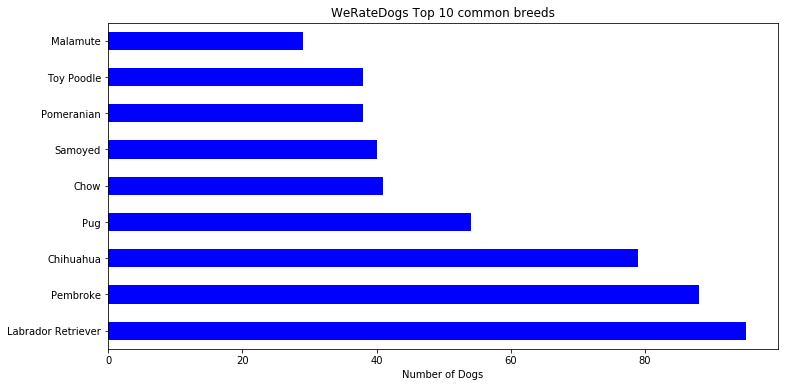

In [222]:
first_10_names = archives_clean['breed'].value_counts()[1:10]
ax = first_10_names.plot('barh', figsize=(12,6), title='WeRateDogs Top 10 common breeds', color='b')
ax.set_xlabel("Number of Dogs")

### 4.2.3 Insights :
- We have data on the WeRateDogs Twitter handle from November-2015 to August-2017 with 2016 having the most tweets (974) and the most active month being December-2015

- 98% of twitter traffic comes from `Twitter for iPhone` 

- out of the 1994 tweets we have, 546 do not have dog names
- Most common dog breeds are the Golden Retriever, Labrador Retriever, Pembroke, Chihuahua, Pug, Chow,  Samoyed, Pomeranian, Toy Poodle and the Malamute

- the most mentioned dog stage is `pupper` followed by `doggo`, `puppo` and `floofer` respectively

- we have ratings numerator  ranges from 0 to 1176, while denominators range from 2 to 170 - with 79% of the tweets with numerator ratings greater than or equal to the denominator

- when the numerator rating was greater than or equals to 10, the tweets had a higher number of  retweets and favorite counts


## 5. Reporting for this Project

Create a 300-600 word written report called `wrangle_report.pdf or wrangle_report.html` that briefly describes your wrangling efforts. This is to be framed as an internal document.

Create a 250-word-minimum written report called `act_report.pdf or act_report.html` that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.